In [118]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
import warnings

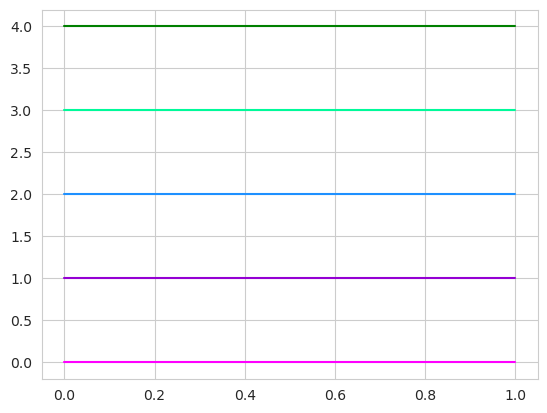

In [119]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [120]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Heterogeneity/')

In [121]:
rahmioglu_b38 = pd.read_table('../Locus_Extraction/Rahmioglu_snps_b38.bed', index_col=3, header=None)
rahmioglu_b38 = rahmioglu_b38.rename({'rs7334326': 'rs9568405'})
rahmioglu_b38.loc['rs9568405', 1] = 50405519
rahmioglu = pd.read_csv('Rahmioglu_processed_signals.csv', index_col='Lead SNP').rename(columns={'Unnamed: 0': 'Signal'})
rahmioglu = rahmioglu.rename({'rs7334326': 'rs9568405'})

rahmioglu['Position (b38)'] = rahmioglu_b38.loc[rahmioglu.index.intersection(rahmioglu_b38.index), 1]
rahmioglu['START'] = rahmioglu['Position (b38)'] - 5E4
rahmioglu['STOP'] = rahmioglu['Position (b38)'] + 5E4
rahmioglu = rahmioglu[~rahmioglu['Chr'].isin(['X'])]
rahmioglu['Chr'] = rahmioglu['Chr'].astype(int)

rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']] = rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']].astype(float)
rahmioglu

,Signal,Chr,Position (hg19),Overall_OR,Overall_P,EUR_RAF,EUR_OR,EUR_P,JPT_RAF,JPT_OR,...,Stage34_OR_CI,Stage34_BETA,Stage12_OR_CI,Stage12_BETA,Infertility_OR_CI,Infertility_BETA,Risk_Allele,Position (b38),START,STOP
Lead SNP,,,,,,,,,,,,,,,,,,,,,
rs10917151,WNT4/1p36.12,1.0,22422721.0,1.14,5.08x10-44,0.16,1.14,3.64x10-41,0.57,1.27,...,(1.16-1.31),0.207014,(1.08-1.24),0.148420,(1.13-1.31),0.190620,A,22096228.0,22046228.0,22146228.0
rs12030576,NGF/1p13.2,1.0,115817221.0,1.06,3.34x10-13,0.65,1.06,1.91x10-13,0.41,0.99,...,(0.97-1.08),0.029559,(1.02-1.15),0.086178,(0.98-1.11),0.039221,G,115274600.0,115224600.0,115324600.0
rs2040445,SLC19A2/1q24.2,1.0,169216412.0,1.17,1.40x10-10,0.97,1.17,1.96x10-10,NaN,NaN,...,(1.28-1.83),0.425268,(0.84-1.24),0.019803,(1.07-1.55),0.254642,G,169247174.0,169197174.0,169297174.0
rs2421985,DNM3/1q24.3,1.0,172099136.0,1.05,6.73x10-14,0.49,1.05,1.72x10-12,0.77,1.28,...,(1.04-1.14),0.086178,(0.97-1.07),0.019803,(0.96-1.07),0.009950,C,172129996.0,172079996.0,172179996.0
rs11674184,GREB1/2p25.1,2.0,11721535.0,1.08,3.16x10-26,0.61,1.08,5.91x10-24,0.54,1.25,...,(1.10-1.22),0.148420,(1.02-1.14),0.067659,(0.99-1.12),0.048790,T,11581409.0,11531409.0,11631409.0
rs1430787,ETAA1/2p14,2.0,67868498.0,1.04,9.65x10-9,0.31,1.04,4.56x10-8,0.22,1.17,...,(1.05-1.16),0.095310,(1.02-1.14),0.076961,(1.01-1.14),0.067659,A,67641366.0,67591366.0,67691366.0
rs6435157,BMPR2/2q33.1,2.0,203441224.0,1.05,4.97x10-8,0.77,1.05,1.12x10-7,0.97,1.42,...,(1.06-1.19),0.122218,(1.01-1.15),0.076961,(1.07-1.22),0.131028,T,202576501.0,202526501.0,202626501.0
rs1352889,BSN/3p21.31,3.0,49652148.0,1.05,2.79x10-8,0.17,1.05,2.79x10-8,NaN,NaN,...,(0.95-1.08),0.019803,(0.98-1.13),0.048790,(0.98-1.13),0.048790,T,49614715.0,49564715.0,49664715.0
rs1903068,KDR/4q12,4.0,56008477.0,1.08,1.55x10-24,0.68,1.08,1.78x10-24,0.88,1.09,...,(1.16-1.29),0.198851,(1.03-1.15),0.086178,(1.05-1.18),0.104360,A,55142310.0,55092310.0,55192310.0


In [127]:
meta_group = 'AFR_EUR' # ALL, AFR_EUR, EUR

phenos = ['endometriosis',
          'cluster_vs_controls_0',
          'cluster_vs_controls_1',
          'cluster_vs_controls_2',
          'cluster_vs_controls_3',
          'cluster_vs_controls_4']

In [128]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None)
    temp['PHENO'] = p
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

def get_chr_pos_signal(x):
    keep_index = rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                           (rahmioglu['START'] < x['POS']) &
                           (rahmioglu['STOP'] > x['POS'])].index
    if len(keep_index) == 0:
        return np.nan
    else:
        return keep_index[0]

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: get_chr_pos_signal(x), axis=1)

p_col, or_col = 'P(R)', 'OR(R)'
p_col, or_col = 'P', 'OR'

df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df[p_col])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['Direction'] = np.sign(df[or_col] - 1)
df['Z'] = df['Direction'] * np.abs(norm.ppf(df[p_col] / 2))
df['BETA'] = np.log(df[or_col])
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - 1.96 * df['SE']
df['CI_U'] = df['BETA'] + 1.96 * df['SE']

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

df

/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),...,Signal,LOGP,Direction,Z,BETA,SE,CI_L,CI_U,CI_OR_L,CI_OR_U
0,1,22048315,chr1:22048315:T:C,C,?,3,1.854000e-02,0.018540,1.3042,1.3042,...,WNT4/1p36.12,1.731890,1.0,2.354653,0.265590,0.112794,0.044514,0.486665,1.045520,1.626882
1,1,22052387,chr1:22052387:C:A,A,?,6,5.077000e-07,0.001021,1.1384,2.1973,...,WNT4/1p36.12,6.294393,1.0,5.023380,0.129624,0.025804,0.079048,0.180200,1.082256,1.197457
2,1,22052387,chr1:22052387:C:A,A,?,3,1.956000e-02,0.019560,1.2980,1.2980,...,WNT4/1p36.12,1.708631,1.0,2.334683,0.260825,0.111717,0.041859,0.479791,1.042747,1.615736
3,1,22052387,chr1:22052387:C:A,A,?,5,3.343000e-02,0.272600,1.1159,1.1321,...,WNT4/1p36.12,1.475864,1.0,2.126881,0.109661,0.051560,0.008604,0.210718,1.008641,1.234564
4,1,22052387,chr1:22052387:C:A,A,?,5,1.754000e-04,0.051770,1.0294,1.0488,...,WNT4/1p36.12,3.755970,1.0,3.752042,0.028976,0.007723,0.013840,0.044113,1.013936,1.045100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,19,8679934,chr19:8679934:C:T,T,?,3,7.531000e-01,0.753100,0.9642,0.9642,...,ACTL9/19p13.2,0.123147,-1.0,-0.314554,-0.036457,0.115899,-0.263619,0.190705,0.768267,1.210103
4517,19,8679934,chr19:8679934:C:T,T,?,5,2.022000e-01,0.202200,1.0637,1.0637,...,ACTL9/19p13.2,0.694219,1.0,1.275309,0.061753,0.048422,-0.033154,0.156661,0.967389,1.169599
4518,19,8679934,chr19:8679934:C:T,T,?,5,6.424000e-01,0.035720,1.0175,0.4936,...,ACTL9/19p13.2,0.192194,1.0,0.464346,0.017349,0.037361,-0.055880,0.090577,0.945653,1.094806
4519,19,8679934,chr19:8679934:C:T,T,?,4,9.248000e-01,0.924800,1.0113,1.0113,...,ACTL9/19p13.2,0.033952,1.0,0.094389,0.011237,0.119046,-0.222093,0.244566,0.800841,1.277067


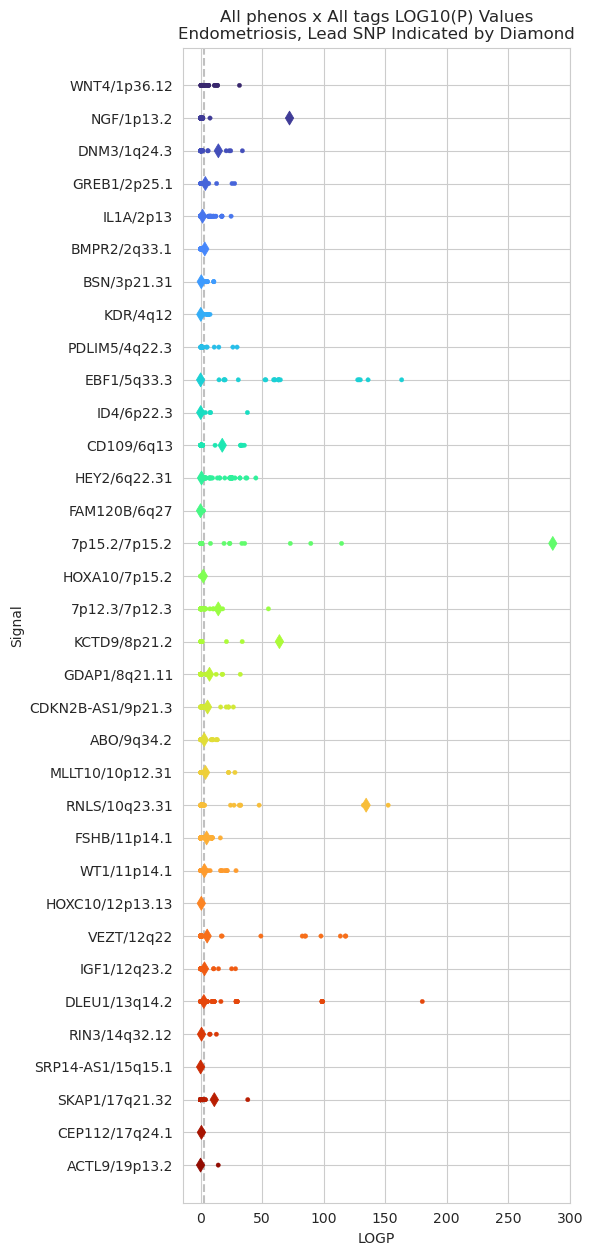

In [130]:
plt.gcf().set_size_inches(5, 15)
plot_df = df.copy()
plot_df = plot_df[plot_df['I'] <= 50]

sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='Signal',
                palette='turbo', edgecolor=None, s=10, legend=False)
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, y='Signal', x='LOGP', hue='Signal',
                palette='turbo', edgecolor=None, s=50, legend=False, marker='d')

sig_line = 0.05 / len(rahmioglu)
plt.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
plt.gca().set_ylim(top-0.5, bottom+0.5)

plt.title('All phenos x All tags LOG10(P) Values\nEndometriosis, Lead SNP Indicated by Diamond')
plt.savefig(f'Plots/{meta_group}_signal_manhattan_plot.png', bbox_inches='tight')
plt.show()

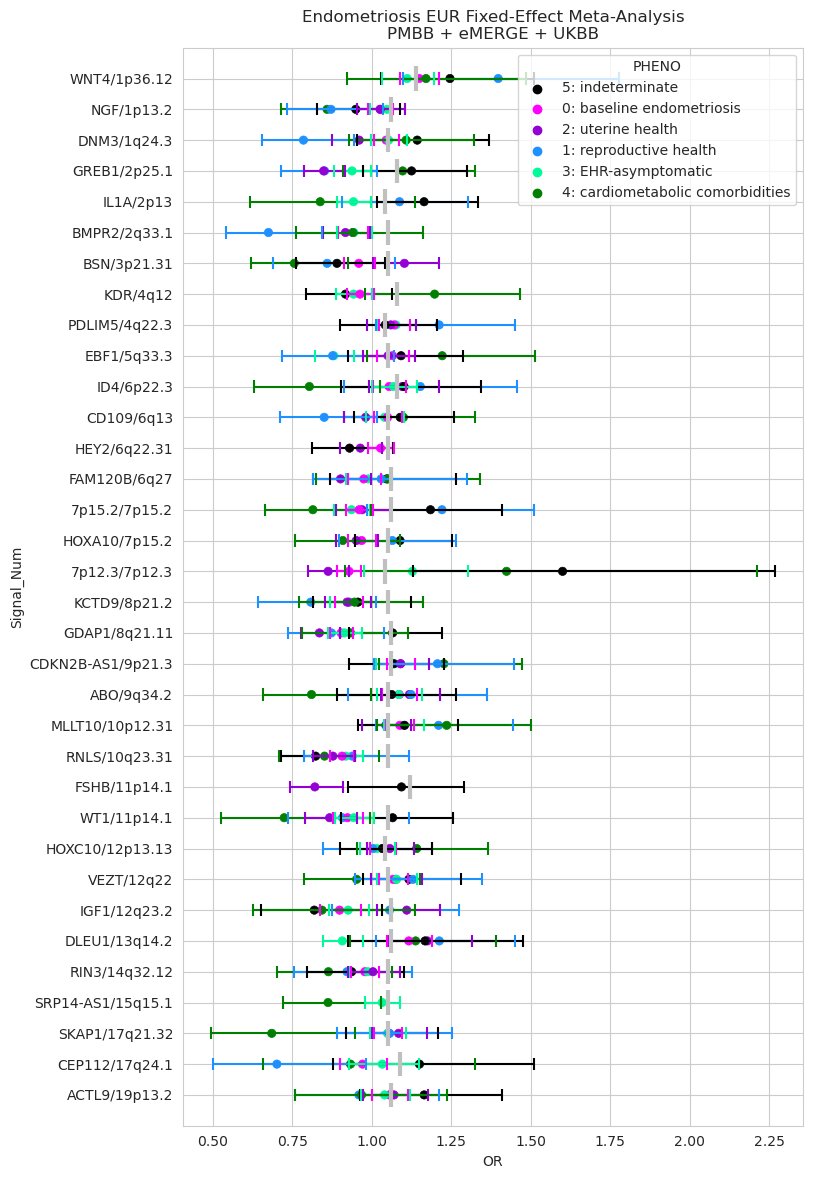

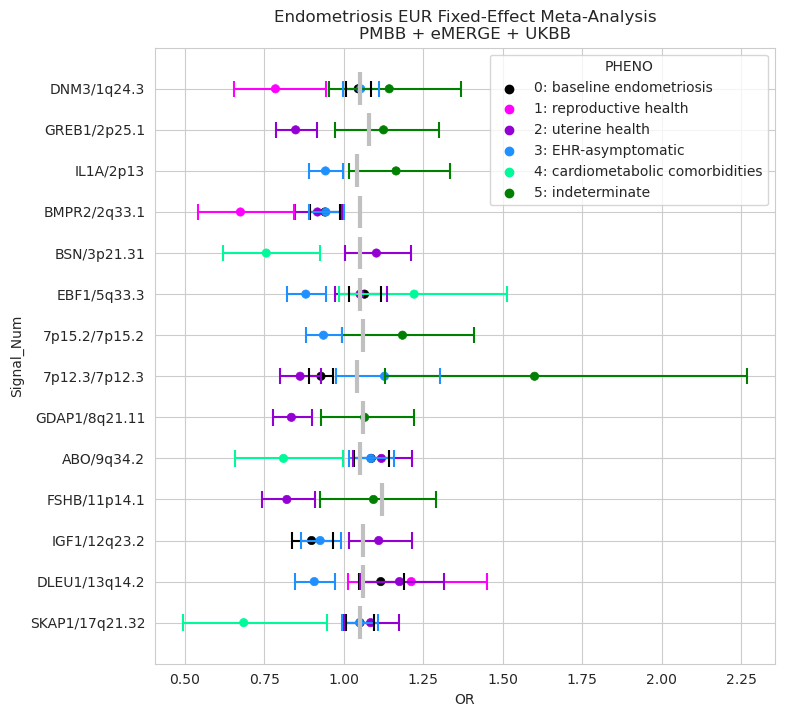

In [125]:
os.makedirs('Plots', exist_ok=True)

pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

plot_df = df.copy()
plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')
plot_df = plot_df[plot_df['I'] <= 50]
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

sns.scatterplot(data=plot_df, y='Signal_Num', x='OR', hue='PHENO',
                palette=colors2, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
ax.set_ylim(-1, max(signal_num.values()) + 1)

plt.savefig(f'Plots/{meta_group}_FE_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

keep_dfs = []

all_differences = pd.DataFrame(data=0, index=plot_df['PHENO'].unique(), columns=plot_df['PHENO'].unique())

for signal, subDF in plot_df.groupby('Signal'):
    M = len(subDF)
    lower_2D_1 = np.broadcast_to(subDF['CI_OR_L'], (M,M))
    lower_2D_2 = np.broadcast_to(subDF['CI_OR_L'], (M,M)).T
    upper_2D_1 = np.broadcast_to(subDF['CI_OR_U'], (M,M))
    upper_2D_2 = np.broadcast_to(subDF['CI_OR_U'], (M,M)).T

    overlap = ((lower_2D_1 <= upper_2D_2) & (upper_2D_1 >= upper_2D_2)) | \
              ((lower_2D_1 <= upper_2D_1) & (upper_2D_1 >= upper_2D_1))

    disjoint = ((lower_2D_1 > upper_2D_2) & (upper_2D_1 > upper_2D_2)) | \
               ((lower_2D_1 < lower_2D_2) & (upper_2D_1 < lower_2D_2))

    disjoint = pd.DataFrame(disjoint | disjoint.T, index=subDF['PHENO'], columns=subDF['PHENO'])
    disjoint = disjoint.reindex_like(all_differences)
    all_differences += disjoint.fillna(0).astype(int)

    if np.any(disjoint):
        keep_phenos = disjoint.index[disjoint.apply(lambda x: np.any(x), axis=1)]
        keep_dfs.append(subDF[subDF['PHENO'].isin(keep_phenos)])

plot_df = pd.concat(keep_dfs)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')

pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

sns.scatterplot(data=plot_df, y='Signal_Num', x='OR', hue='PHENO',
                palette=colors2, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
ax.set_ylim(-1, max(signal_num.values()) + 1)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_FE_disjoint_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

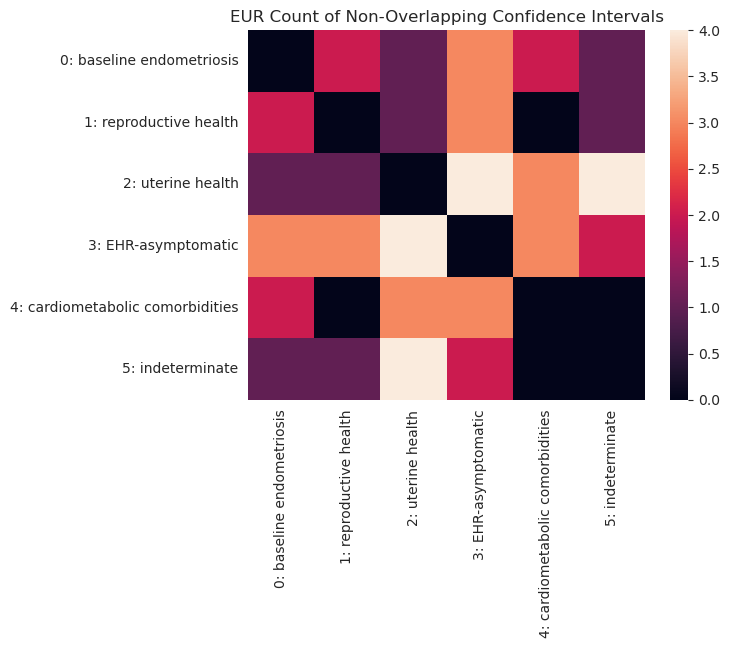

In [126]:
sns.heatmap(all_differences.sort_index().sort_index(axis=1))
plt.title(f'{meta_group} Count of Non-Overlapping Confidence Intervals')
plt.savefig(f'Plots/{meta_group}_pheno_diff_heatmap.png', bbox_inches='tight')